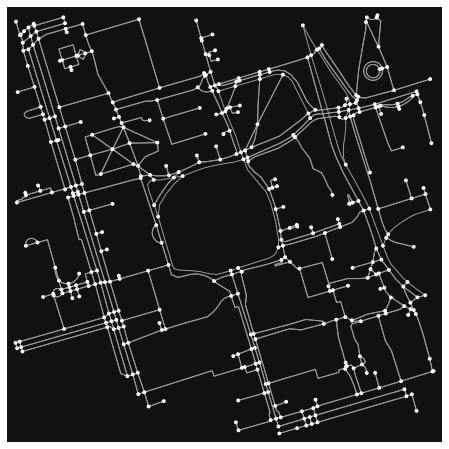

In [51]:
import networkx as nx
import osmnx
import matplotlib.pyplot as plt
from search_optimization_tools.algorithms import Kruskal

reference = (43.661667, -79.395)
G = osmnx.graph_from_point(reference, dist=300, clean_periphery=True, simplify=True)
fig, ax = osmnx.plot_graph(G)


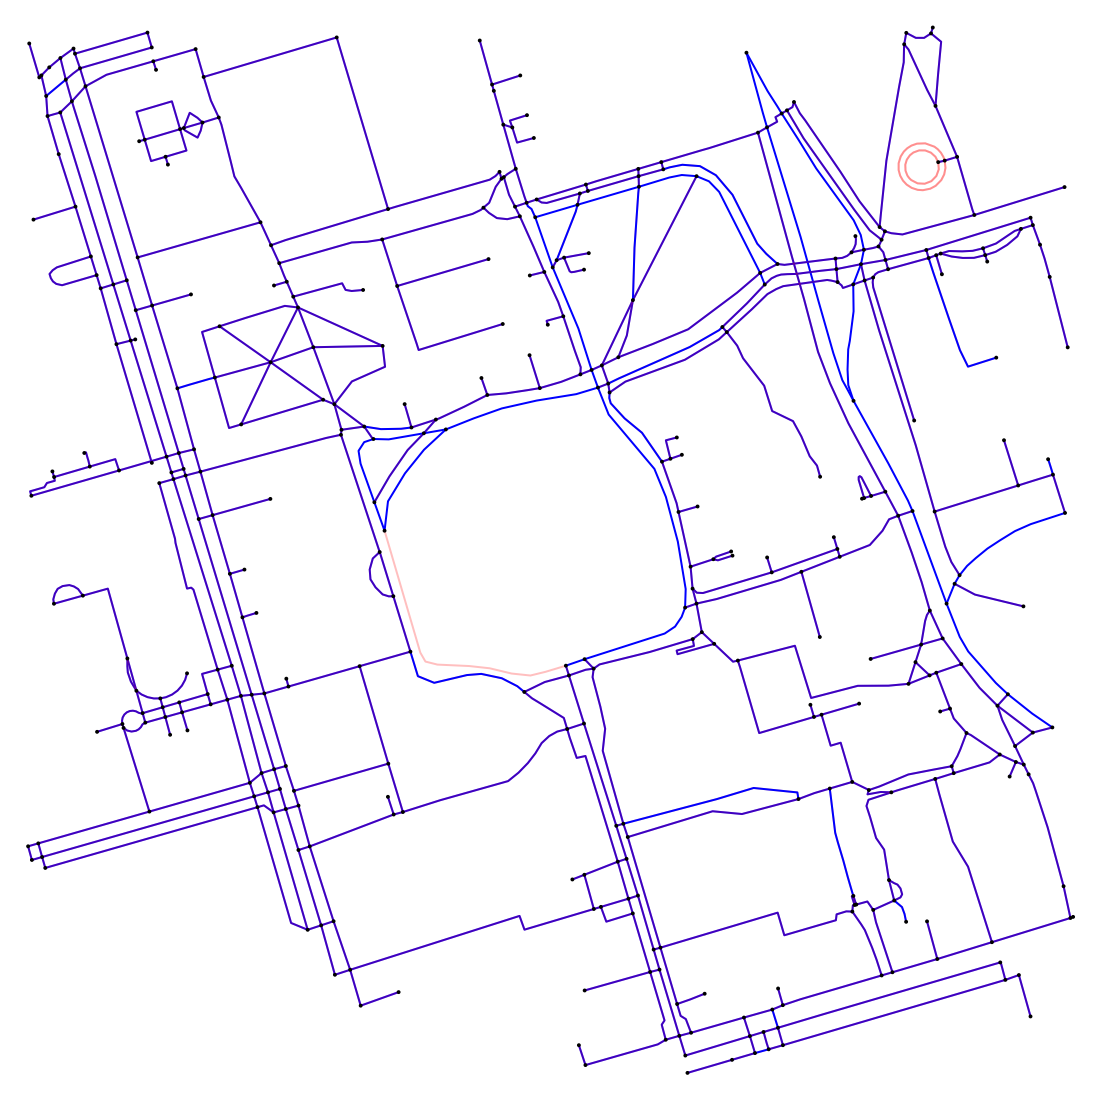

In [52]:
sorted_edges = sorted(G.edges(data=True), key=lambda t: G[t[0]][t[1]][0]["length"])

mst = Kruskal(G, sorted_edges=True, edges= sorted_edges, graph_type=nx.MultiDiGraph)

highlight_edges = ['b' if e in mst.edges else 'r' for e in G.edges]
edge_alphas = [1 if e in mst.edges else 0.25 for e in G.edges]
osmnx.plot_graph(G,figsize=(20,20),edge_linewidth=2, edge_color=highlight_edges, bgcolor="w", node_color="k", edge_alpha=edge_alphas)
plt.show()